# Classification and Error Metrics

## Introduction
After data analysis and visualization, identify the key features, convert them to suitable numeric format, and use only the processed features for further processing and prediction. Plot and observe the spread of the disease in other countries and identify top countries whose data can be used to predict the spread in Pakistan.

# Section 1

In [257]:
!pip install scikit-plot

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this section will use [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) to classify if a patient will survive the COVID-19. You will use `COVID19_line_list_data.csv` and `COVID19_open_line_list.csv` for this assignment.

## Question 1
Explore both the CSVs mentioned above and argue which has more useful features for correctly classifying if a patient is likely to survive the COVID-19. Mention specific features from both files that will and will not correlate to the target (outcome).

In [259]:
print("From amongst both of the csvs we have used the features age, sex, symptoms, city, province, lives_in_Wuhan, travel_history_location. Thus, these feature would correlate the most and this is why I have eliminated the rest" )

From amongst both of the csvs we have used the features age, sex, symptoms, city, province, lives_in_Wuhan, travel_history_location. Thus, these feature would correlate the most and this is why I have eliminated the rest


## Question 2

Import the chosen file and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Remove extra feature columns
* Encode the non-numeric values as an integer
* Determine the breakdown of target values

In [260]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

dataset = pd.read_csv("COVID19_open_line_list.csv")
print("Complete dataset: ","\n")
print(dataset)
print("\n")
print("\n\n")


print("1. The value count for all coulmns are as follows: ")
print("\n")

for i in dataset:
  print(dataset[i].value_counts(dropna = True))
  print("\n")



print("2. There is no need to scale the features")
print("\n\n")

#Encoder
dataset_used = dataset[["age", "sex", "symptoms", "city", "lives_in_Wuhan", "travel_history_location","outcome"]]
df1 = dataset_used["outcome"]
# dataset_used["outcome"] = dataset_used.replace("Death,Died","death",regex=True)
# dataset_used["outcome"] = dataset_used.replace("discharged,Discharge, recovered","discharge",regex=True)

#extracting values
dataset_used["outcome"] = dataset_used["outcome"].replace(to_replace =["Death","Died","died"], value ="death")
dataset_used["outcome"] = dataset_used["outcome"].replace(to_replace =["discharged","Discharged","recovered"], value ="discharge")
dataset_used["outcome"] = dataset_used["outcome"].replace(to_replace =["critical condition, intubated as of 14.02.2020"], value = "severe")
dataset_used["outcome"] = dataset_used["outcome"].replace(to_replace =["Symptoms only improved with cough. Currently hospitalized for follow-up.","05.02.2020"], value =np.nan)
dataset_used["outcome"] = dataset_used["outcome"].replace(to_replace =["treated in an intensive care unit (14.02.2020)"], value ="severe")

print("Dataset after extracting and correcting the outcome table:")
print("\n")
print(dataset_used)

dataset_used_copy = dataset_used.replace("", np.nan, regex=True)
le = preprocessing.LabelEncoder()
dataset_used['age'] = le.fit_transform((dataset_used_copy['age']).astype(str))
dataset_used['sex'] = le.fit_transform((dataset_used_copy['sex']).astype(str))
dataset_used['symptoms'] = le.fit_transform((dataset_used_copy['symptoms']).astype(str))
dataset_used['city'] = le.fit_transform((dataset_used_copy['city']).astype(str))
dataset_used['lives_in_Wuhan'] = le.fit_transform((dataset_used_copy['lives_in_Wuhan']).astype(str))
dataset_used['travel_history_location'] = le.fit_transform((dataset_used_copy['travel_history_location']).astype(str))
dataset_used['outcome'] = le.fit_transform((dataset_used_copy['outcome']).astype(str))


Complete dataset:  

        ID  age     sex  ... Unnamed: 42 Unnamed: 43 Unnamed: 44
0      1.0   30    male  ...         NaN         NaN         NaN
1      2.0   47    male  ...         NaN         NaN         NaN
2      3.0   49    male  ...         NaN         NaN         NaN
3      4.0   47  female  ...         NaN         NaN         NaN
4      5.0   50  female  ...         NaN         NaN         NaN
...    ...  ...     ...  ...         ...         ...         ...
14121  NaN  NaN     NaN  ...         NaN         NaN         NaN
14122  NaN  NaN     NaN  ...         NaN         NaN         NaN
14123  NaN  NaN     NaN  ...         NaN         NaN         NaN
14124  NaN  NaN     NaN  ...         NaN         NaN         NaN
14125  NaN  NaN     NaN  ...         NaN         NaN         NaN

[14126 rows x 45 columns]





1. The value count for all coulmns are as follows: 


11783.0    1
6436.0     1
8437.0     1
5362.0     1
7782.0     1
          ..
3716.0     1
2142.0     1
723.0    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [261]:
print("Encoded dataset: ", "\n")
print(dataset_used)

Encoded dataset:  

       age  sex  symptoms  ...  lives_in_Wuhan  travel_history_location  outcome
0       39    4       191  ...              21                      132        2
1       62    4       191  ...              11                       80        2
2       64    4       191  ...              11                      166        2
3       62    3       191  ...              11                      174        2
4       66    3       191  ...              11                      132        2
...    ...  ...       ...  ...             ...                      ...      ...
14121  116    5       191  ...              10                      174        2
14122  116    5       191  ...              10                      174        2
14123  116    5       191  ...              10                      174        2
14124  116    5       191  ...              10                      174        2
14125  116    5       191  ...              10                      174        2

[14126 

In [262]:
#Breakdown of Target Values
print("Breakdown of the target values are as follows: ")
print("\n")
breakdown = pd.DataFrame()
breakdown["actual"] = df1.drop_duplicates()
breakdown["encoded"] = dataset_used["outcome"].drop_duplicates()
print(breakdown)

Breakdown of the target values are as follows: 


         actual  encoded
0           NaN        2
18    discharge        1
175       death        0
5526     stable        4
9375     severe        3


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.

In [263]:
#Splitting the dataset
from sklearn.model_selection import train_test_split 

X = dataset_used[["age", "sex", "symptoms", "city", "lives_in_Wuhan", "travel_history_location"]]
Y = dataset_used[["outcome"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 


#ratio of classes in both the train and test splits
for i in range(6):
  X_train_unique = X_train.iloc[:,i].drop_duplicates()
  print("Train to test ratio for " + X_train_unique.name + " is: " + str((X_train_unique.shape[0])/(X_test_unique.shape[0])))

print("\n")

Y_train_unique = y_train.drop_duplicates()
print("Train to test ratio for outcome is: " + str((Y_train_unique.shape[0])/(Y_test_unique.shape[0])))




Train to test ratio for age is: 2.923076923076923
Train to test ratio for sex is: 0.15384615384615385
Train to test ratio for symptoms is: 4.717948717948718
Train to test ratio for city is: 19.0
Train to test ratio for lives_in_Wuhan is: 0.48717948717948717
Train to test ratio for travel_history_location is: 4.128205128205129


Train to test ratio for outcome is: 1.25


## Question 4

Let's now fit a Naive Bayes classifier to this data in order to predict "outcome".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns).Choices are:
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [264]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 

# training the model on training set 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# making predictions on the testing set 
GNB_y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("\n\n")
print("The accuracy for Naive Bayes model using GaussianNB is: ", metrics.accuracy_score(y_test, GNB_y_pred)*100)
print("\n")


#Cross Validation Score
from sklearn.model_selection import cross_val_score

#GaussianNB
gnb = cross_val_score(gnb, X_test, y_test)
print("Cross Val for GaussianNB: ", gnb)

print("\n\n")






The accuracy for Naive Bayes model using GaussianNB is:  90.97664543524417


Cross Val for GaussianNB:  [0.88515901 0.90088496 0.8920354  0.01769912 0.90973451]





/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/l

## Question 5

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [265]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# training the model on training set 
mnb = MultinomialNB() 
mnb.fit(X_train, y_train) 

# making predictions on the testing set 
MNB_y_pred = mnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 

print("The accuracy for Naive Bayes model using MultinomialNB is: ", metrics.accuracy_score(y_test, MNB_y_pred)*100)
print("\n")

#BernoulliNB
from sklearn.naive_bayes import BernoulliNB

# training the model on training set 
bnb = BernoulliNB() 
bnb.fit(X_train, y_train) 

# making predictions on the testing set 
BNB_y_pred = bnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 

print("The accuracy for Naive Bayes model using BernoulliNB is: ", metrics.accuracy_score(y_test, BNB_y_pred)*100)
print("\n\n")


#MultinomialNB
mnb = cross_val_score(mnb, X_test, y_test)
print("Cross Val for MultinomialNB: ", mnb)

#BernoulliNB
bnb = cross_val_score(bnb, X_test, y_test)
print("Cross Val for BernoulliNB: ", bnb)

print("\n\n")

print("1.   GaussianNB is working better tha both of the others")
print("\n")
print("2.   Bernoulli performs like this becuase it works for binary (0,1). "+"\n"+
      "     BernoulliNB works best for less dataset hence, this is why "+"\n"+
      "     bernoulli works best. But, in our case as we have 5 values "+"\n"+
      "     it is assuming and taking any two of them and this is why "+"\n"+
      "     the accuracy is way too high. ")

print("\n\n")



The accuracy for Naive Bayes model using MultinomialNB is:  56.79405520169851


The accuracy for Naive Bayes model using BernoulliNB is:  98.72611464968153



Cross Val for MultinomialNB:  [0.58657244 0.27433628 0.32389381 0.7079646  0.73097345]
Cross Val for BernoulliNB:  [0.98586572 0.98761062 0.98761062 0.98761062 0.98761062]



1.   GaussianNB is working better tha both of the others


2.   Bernoulli performs like this becuase it works for binary (0,1). 
     BernoulliNB works best for less dataset hence, this is why 
     bernoulli works best. But, in our case as we have 5 values 
     it is assuming and taking any two of them and this is why 
     the accuracy is way too high. 





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tru

## Question 6

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix (plot)

Gaussian Naive Bayes model accuracy:  90.97664543524417
Bernouilli Naive Bayes model accuracy:  98.72611464968153
Multinomial Naive Bayes Naive Bayes model accuracy:  56.79405520169851


Gaussian Naive Bayes model precision:  98.56440401340588
Bernouilli Naive Bayes model precision:  97.46845713822061
Multinomial Naive Bayes model precision:  98.21585399269443




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/scikitplot/metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Gaussian Naive Bayes model recall:  90.97664543524417
Bernouilli Naive Bayes model recall:  98.72611464968153
Multinomial Naive Bayes model recall:  56.7940552016985


Gaussian Naive Bayes model fscore:  94.40764187770787
Bernouilli Naive Bayes model fscore:  98.0932549403887
Multinomial Naive Bayes model fscore:  71.78704138434523












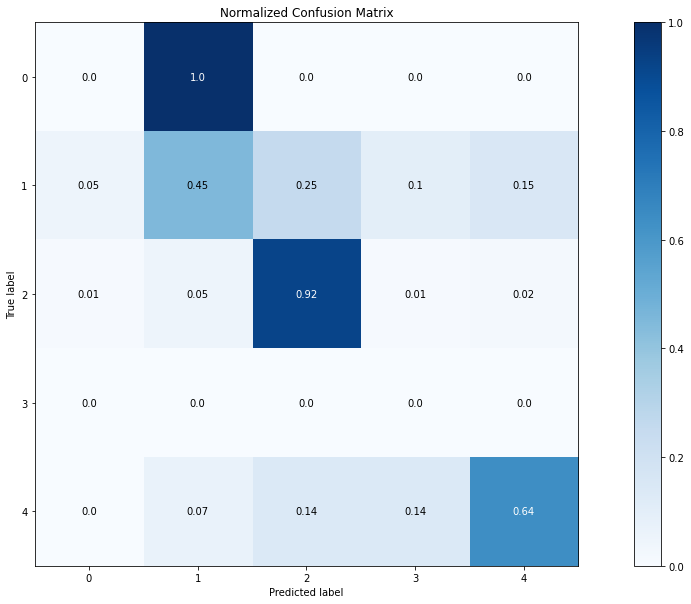

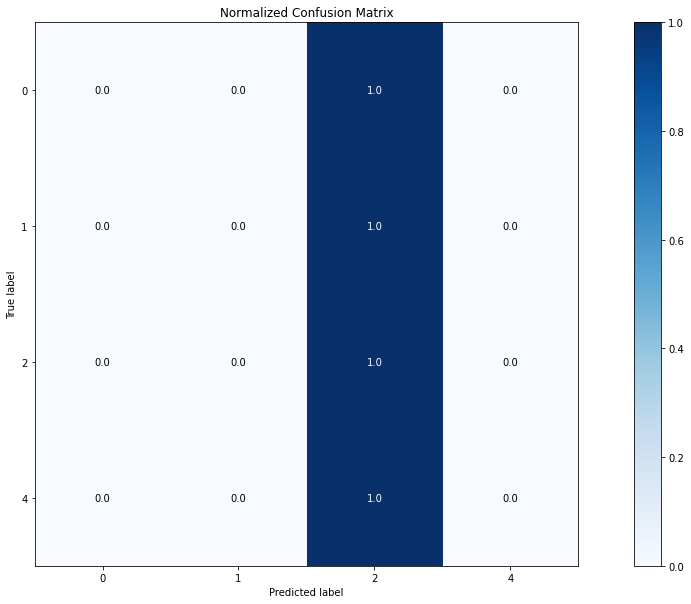

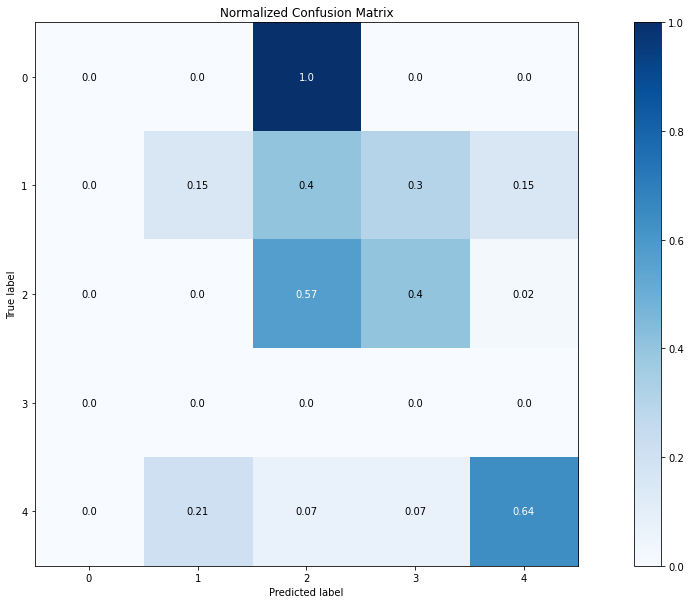

In [266]:
print("Gaussian Naive Bayes model accuracy: ", metrics.accuracy_score(y_test, GNB_y_pred)*100) 
print("Bernouilli Naive Bayes model accuracy: ", metrics.accuracy_score(y_test, BNB_y_pred)*100) 
print("Multinomial Naive Bayes Naive Bayes model accuracy: ", metrics.accuracy_score(y_test, MNB_y_pred)*100)  

print("\n")

print("Gaussian Naive Bayes model precision: ", metrics.precision_score(y_test, GNB_y_pred,average='weighted')*100) 
print("Bernouilli Naive Bayes model precision: ", metrics.precision_score(y_test, BNB_y_pred,average='weighted')*100) 
print("Multinomial Naive Bayes model precision: ", metrics.precision_score(y_test, MNB_y_pred,average='weighted')*100) 

print("\n")

print("Gaussian Naive Bayes model recall: ", metrics.recall_score(y_test, GNB_y_pred,average='weighted')*100) 
print("Bernouilli Naive Bayes model recall: ", metrics.recall_score(y_test, BNB_y_pred,average='weighted')*100) 
print("Multinomial Naive Bayes model recall: ", metrics.recall_score(y_test, MNB_y_pred,average='weighted')*100)  

print("\n")

print("Gaussian Naive Bayes model fscore: ", metrics.f1_score(y_test, GNB_y_pred,average='weighted')*100) 
print("Bernouilli Naive Bayes model fscore: ", metrics.f1_score(y_test, BNB_y_pred,average='weighted')*100) 
print("Multinomial Naive Bayes model fscore: ", metrics.f1_score(y_test, MNB_y_pred,average='weighted')*100) 

print("\n\n")


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import scikitplot as skplt



skplt.metrics.plot_confusion_matrix(y_test,GNB_y_pred, normalize=True, figsize=(20,10))
print("\n")

skplt.metrics.plot_confusion_matrix(y_test,BNB_y_pred, normalize=True, figsize=(20,10))
print("\n")


skplt.metrics.plot_confusion_matrix(y_test,MNB_y_pred, normalize=True, figsize=(20,10))
print("\n\n")



## Question 7
Let's dive more into the feature analysis.
* Create a bar plot showing the correlations between each column and `outcome`
* Pick the most 5 correlated fields (using the absolute value of correlations) and create new `X`
* Re-train your chosen Naive Bayes classifier to this data, and compare results

Correlation of all columns with outcome is: 
age                        0.121647
sex                        0.041850
symptoms                   0.055918
city                       0.003656
lives_in_Wuhan             0.001208
travel_history_location    0.030192
outcome                    1.000000
dtype: float64




age                        0.121647
symptoms                   0.055918
sex                        0.041850
travel_history_location    0.030192
city                       0.003656
dtype: float64



The accuracy for Naive Bayes model using Gaussian (most 5 correlated) is:  91.43665958952583



It can be seen that for the most correlated columns the accuracy for GaussianNB model has increased from 90.97% to 91.43%





/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


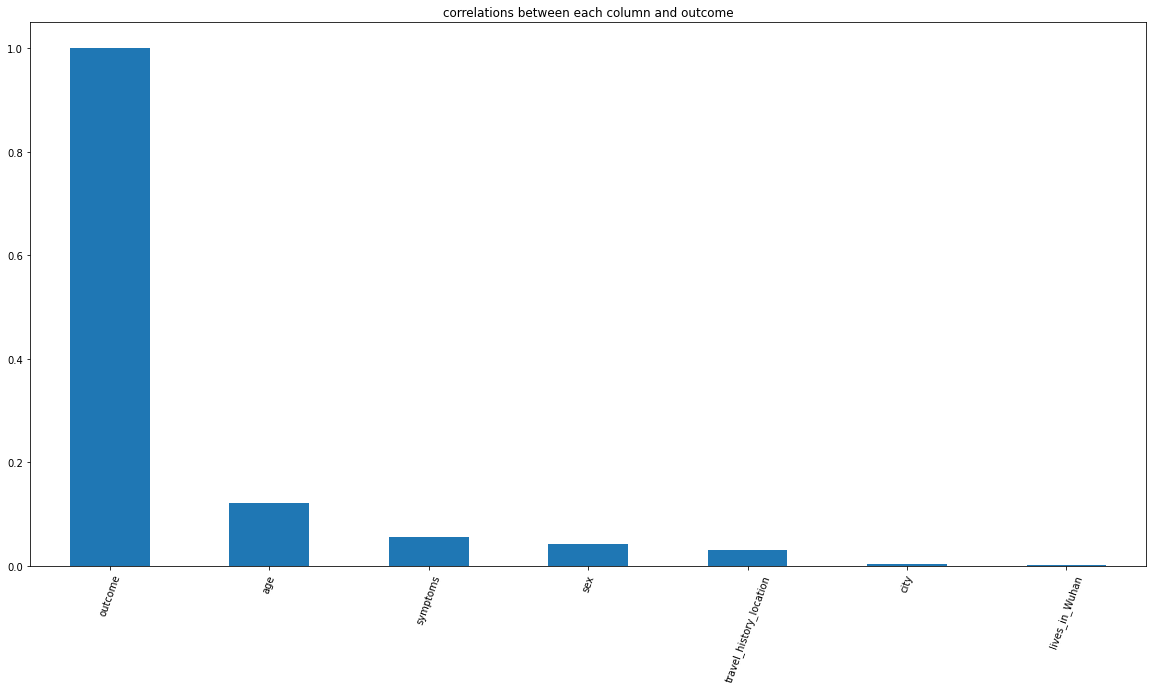

In [267]:
correlation = abs(dataset_used.corrwith(dataset_used["outcome"]))
print("Correlation of all columns with outcome is: ")
print(correlation)
print("\n")


#Bar plot
(correlation.sort_values(ascending=False)).plot.bar(rot=70, title="correlations between each column and outcome", figsize=(20,10));
print("\n")


#five most correlated field
five_correlated = correlation.sort_values(ascending=False)
five_correlated = five_correlated.iloc[1:6]
print(five_correlated)
print("\n\n")


#Splitting the dataset
from sklearn.model_selection import train_test_split 

X = dataset_used[["age", "sex", "symptoms", "city", "travel_history_location"]]
Y = dataset_used[["outcome"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

#BernoulliNB
from sklearn.naive_bayes import GaussianNB

# training the model on training set 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# making predictions on the testing set 
GNB_y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 

print("The accuracy for Naive Bayes model using Gaussian (most 5 correlated) is: ", metrics.accuracy_score(y_test, GNB_y_pred)*100)
print("\n\n")



print("It can be seen that for the most correlated columns the accuracy for GaussianNB model has increased from 90.97% to 91.43%")
print("\n\n")


<hr>

# Section 2

In this section will use [Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) to observe the spreading trend of COVID-19. You are required to use the data reported till **31-March-2020**.

## Question 1
Use `time_series_covid19_confirmed_global.csv` and plot the trend of disease spread in 10 most affected countries.

In [268]:
dataset = pd.read_csv("time_series_covid19_confirmed_global.csv")
dataset = dataset.drop(dataset.iloc[:,74:84].columns, axis=1)
print("Complete data till 31-03-2020: ","\n")
print(dataset)

Complete data till 31-03-2020:  

                Province/State         Country/Region  ...  3/30/20  3/31/20
0                          NaN            Afghanistan  ...      170      174
1                          NaN                Albania  ...      223      243
2                          NaN                Algeria  ...      584      716
3                          NaN                Andorra  ...      370      376
4                          NaN                 Angola  ...        7        7
..                         ...                    ...  ...      ...      ...
259  Saint Pierre and Miquelon                 France  ...        0        0
260                        NaN            South Sudan  ...        0        0
261                        NaN         Western Sahara  ...        0        0
262                        NaN  Sao Tome and Principe  ...        0        0
263                        NaN                  Yemen  ...        0        0

[264 rows x 74 columns]


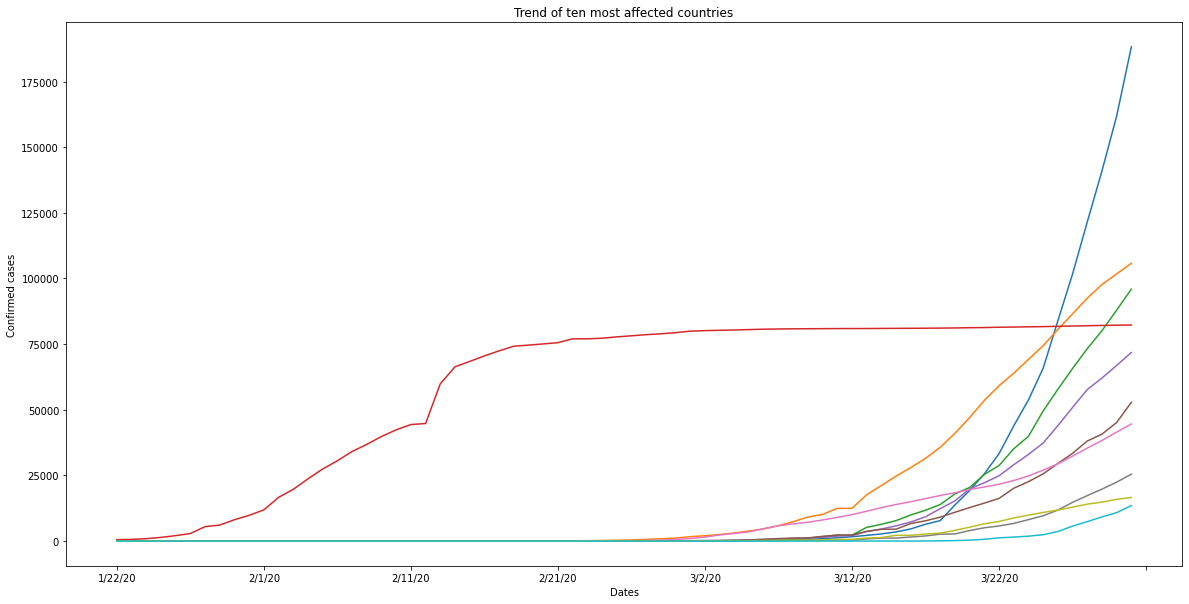

In [269]:
dataset_1 = dataset.drop(["Lat","Long"], axis=1)
dataset_1 = dataset_1.groupby("Country/Region").sum()
dataset_1 = dataset_1.sort_values(by='3/31/20', ascending=False)
top_ten_affected = dataset_1.head(10)

#plotting graphs
plt.title('Trend of ten most affected countries')
plt.xlabel("Dates")
plt.ylabel("Confirmed cases")
for i in range(len(top_ten_affected)):
  top_ten_affected.iloc[i].plot(kind="line", figsize=(20,10))

## Question 2
Use `csse_covid_19_daily_reports` to compare the mortality and survival rates in 10 most affected countries as of 31-March-2020.

In [270]:
daily_reports = pd.read_csv("03-31-2020.csv")
daily_reports = daily_reports.groupby("Country_Region").sum()
daily_reports = daily_reports.sort_values(by="Confirmed", ascending=False)
top_ten = daily_reports.head(10)
top_ten = top_ten.reset_index()

#Comparing the mortality and survival rates of top ten affected countries
for i  in range(len(top_ten)):
  print("For ",top_ten["Country_Region"].iloc[i],":")
  print("\n")
  print("Mortality Rate: ", (top_ten["Deaths"].iloc[i])/top_ten["Confirmed"].iloc[i]*100)
  print("Survival Rate: ", (top_ten["Recovered"].iloc[i])/top_ten["Confirmed"].iloc[i]*100)
  print("\n\n")
  

For  US :


Mortality Rate:  2.0582233275939035
Survival Rate:  3.7327551389154605



For  Italy :


Mortality Rate:  11.747580157289777
Survival Rate:  14.86785390199637



For  Spain :


Mortality Rate:  8.823744044702522
Survival Rate:  20.077562211357026



For  China :


Mortality Rate:  4.021682324773028
Survival Rate:  92.61901578774658



For  Germany :


Mortality Rate:  1.0792669340463457
Survival Rate:  22.42090017825312



For  France :


Mortality Rate:  6.68597497491813
Survival Rate:  18.00783690158442



For  Iran :


Mortality Rate:  6.497029480999888
Survival Rate:  32.85730299293801



For  United Kingdom :


Mortality Rate:  7.036615517444371
Survival Rate:  0.7024842039166437



For  Switzerland :


Mortality Rate:  2.6076482987052096
Survival Rate:  10.978620897320084



For  Turkey :


Mortality Rate:  1.5815534698100657
Survival Rate:  1.7958761362796543





## Question 3
Identify top 5 countries (min 1000 cases) which have same spread trend as **Pakistan**. Compare progression of virus in 7 days moving window of these countries in terms of confirmed cases, deaths, and recoveries.

In [271]:

min_thousand = dataset.groupby("Country/Region").sum()
min_thousand = min_thousand[min_thousand["3/31/20"]>=1000]
min_thousand = min_thousand.drop(["Lat","Long"], axis=1)
# min_thousand = min_thousand.reset_index()

# min_thousand = daily_reports["Confirmed"]>1000
# print(min_thousand)


#Finding the index for pakistan to compare
# for i in range(len(min_thousand)):
#   if min_thousand["Country/Region"].iloc[i] == "Pakistan":
#     index = i
# print(index)


#correlating fields
corr = min_thousand.corrwith(min_thousand.iloc[30], axis=1)
corr = corr.sort_values(ascending=False)
print("top 5 countries (min 1000 cases) which have same spread trend as Pakistan: ","\n")
print(corr.head(6))



top 5 countries (min 1000 cases) which have same spread trend as Pakistan:  

Country/Region
Pakistan       1.000000
Germany        0.996877
Indonesia      0.996594
Austria        0.996355
Switzerland    0.996180
Czechia        0.996137
dtype: float64


Moving window for Confirmed case: 




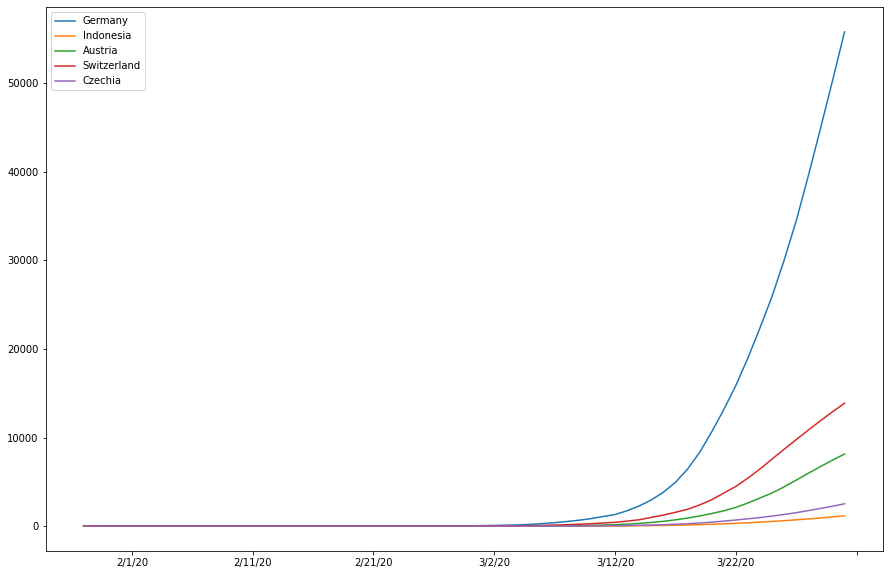

In [272]:
from matplotlib import pyplot
#Moving Window

dataset_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
dataset_confirmed = dataset_confirmed.drop(dataset_confirmed.iloc[:,74:84].columns, axis=1)
dataset_confirmed = dataset_confirmed.groupby("Country/Region").sum()
dataset_confirmed = dataset_confirmed.drop(["Lat","Long"], axis=1)
# dataset_confirmed = dataset_confirmed.reset_index()

#Seven day moving window for Confirmed cases of top five affected countries
Confirmed_window = pd.DataFrame()

# Data_Germany= dataset_confirmed.loc[dataset_confirmed["Country/Region"] == "Germany"]
Confirmed_window["Germany"] = dataset_confirmed.loc["Germany",:].rolling(7).mean()
Confirmed_window["Indonesia"] = dataset_confirmed.loc["Indonesia",:].rolling(7).mean()
Confirmed_window["Austria"] = dataset_confirmed.loc["Austria",:].rolling(7).mean()
Confirmed_window["Switzerland"] = dataset_confirmed.loc["Switzerland",:].rolling(7).mean()
Confirmed_window["Czechia"] = dataset_confirmed.loc["Czechia",:].rolling(7).mean()
print("Moving window for Confirmed case: ")
print("\n")
Confirmed_window.plot(figsize=(15,10))


Moving window for recovered case: 




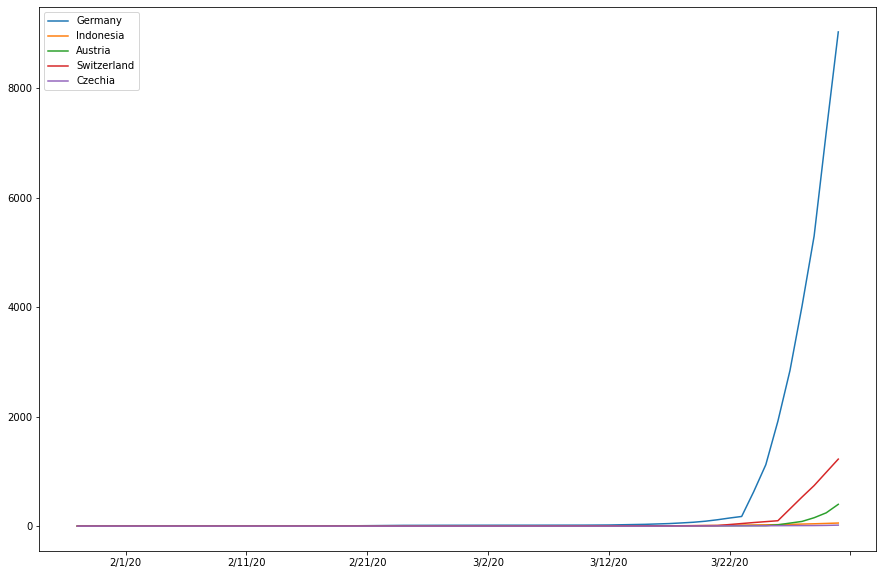

In [273]:
#Seven day moving window for Recovered cases of top five affected countries
dataset_confirmed = pd.read_csv("time_series_covid19_recovered_global.csv")
dataset_confirmed = dataset_confirmed.drop(dataset_confirmed.iloc[:,74:84].columns, axis=1)
dataset_confirmed = dataset_confirmed.groupby("Country/Region").sum()
dataset_confirmed = dataset_confirmed.drop(["Lat","Long"], axis=1)
# dataset_confirmed = dataset_confirmed.reset_index()

#Seven day moving window for Confirmed cases of top five affected countries
Confirmed_window = pd.DataFrame()

# Data_Germany= dataset_confirmed.loc[dataset_confirmed["Country/Region"] == "Germany"]
Confirmed_window["Germany"] = dataset_confirmed.loc["Germany",:].rolling(7).mean()
Confirmed_window["Indonesia"] = dataset_confirmed.loc["Indonesia",:].rolling(7).mean()
Confirmed_window["Austria"] = dataset_confirmed.loc["Austria",:].rolling(7).mean()
Confirmed_window["Switzerland"] = dataset_confirmed.loc["Switzerland",:].rolling(7).mean()
Confirmed_window["Czechia"] = dataset_confirmed.loc["Czechia",:].rolling(7).mean()
print("Moving window for recovered case: ")
print("\n")
Confirmed_window.plot(figsize=(15,10))


Moving window for deaths: 




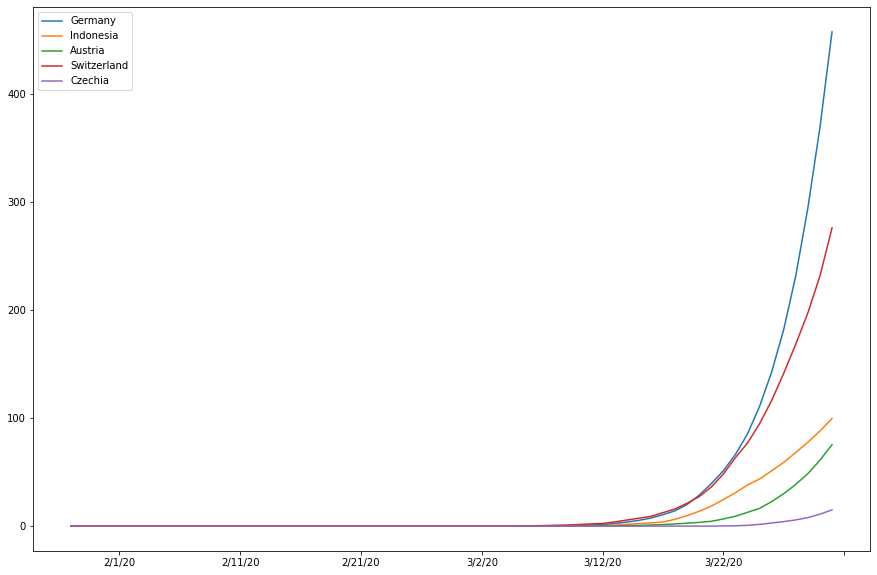

In [274]:
#Seven day moving window for Recovered cases of top five affected countries
dataset_confirmed = pd.read_csv("time_series_covid19_deaths_global.csv")
dataset_confirmed = dataset_confirmed.drop(dataset_confirmed.iloc[:,74:84].columns, axis=1)
dataset_confirmed = dataset_confirmed.groupby("Country/Region").sum()
dataset_confirmed = dataset_confirmed.drop(["Lat","Long"], axis=1)
# dataset_confirmed = dataset_confirmed.reset_index()

#Seven day moving window for Confirmed cases of top five affected countries
Confirmed_window = pd.DataFrame()

# Data_Germany= dataset_confirmed.loc[dataset_confirmed["Country/Region"] == "Germany"]
Confirmed_window["Germany"] = dataset_confirmed.loc["Germany",:].rolling(7).mean()
Confirmed_window["Indonesia"] = dataset_confirmed.loc["Indonesia",:].rolling(7).mean()
Confirmed_window["Austria"] = dataset_confirmed.loc["Austria",:].rolling(7).mean()
Confirmed_window["Switzerland"] = dataset_confirmed.loc["Switzerland",:].rolling(7).mean()
Confirmed_window["Czechia"] = dataset_confirmed.loc["Czechia",:].rolling(7).mean()
print("Moving window for deaths: ")
print("\n")
Confirmed_window.plot(figsize=(15,10))


<hr>

## Bonus
Calculate and plot the min, max, average, median number of days for a patient to recover using one of the data files mentioned above. <br>**Hint:** use `boxplot`

In [275]:
#Reading data

dataset_1 = pd.read_csv("COVID19_open_line_list.csv")
dataset_1_used = dataset_1[["date_confirmation","outcome","date_death_or_discharge"]]
dataset_1_used["outcome"] = dataset_1_used["outcome"].replace(to_replace =["Death","Died","died"], value ="death")
dataset_1_used["outcome"] = dataset_1_used["outcome"].replace(to_replace =["discharged","Discharged","recovered"], value ="discharge")
dataset_1_used["outcome"] = dataset_1_used["outcome"].replace(to_replace =["critical condition, intubated as of 14.02.2020"], value = "severe")
dataset_1_used["outcome"] = dataset_1_used["outcome"].replace(to_replace =["Symptoms only improved with cough. Currently hospitalized for follow-up.","05.02.2020"], value =np.nan)
dataset_1_used["outcome"] = dataset_1_used["outcome"].replace(to_replace =["treated in an intensive care unit (14.02.2020)"], value ="severe")

dataset_1_used = dataset_1_used[dataset_1_used["outcome"] == "discharge"]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [276]:
#cleaning data

dataset_1_used["date_confirmation"] = pd.to_datetime(dataset_1_used['date_confirmation'], errors='coerce')
dataset_1_used["date_death_or_discharge"] = pd.to_datetime(dataset_1_used['date_death_or_discharge'], errors='coerce')
dataset_1_used["number_of_days"] = dataset_1_used["date_death_or_discharge"] - dataset_1_used["date_confirmation"]
dataset_1_used = dataset_1_used[dataset_1_used.date_death_or_discharge != "02.02.2022"]
dataset_1_used = dataset_1_used[dataset_1_used.date_death_or_discharge != "02.02.2021"]
dataset_1_used = dataset_1_used[dataset_1_used["date_confirmation"] < dataset_1_used["date_death_or_discharge"]]

print("Number of days taken by a patient to recover: ")
print("\n")
dataset_1_used




Number of days taken by a patient to recover: 




,date_confirmation,outcome,date_death_or_discharge,number_of_days
18,2020-01-21,discharge,2020-01-24,3 days
55,2020-01-21,discharge,2020-01-29,8 days
161,2020-01-24,discharge,2020-01-28,4 days
313,2020-01-24,discharge,2020-03-02,38 days
613,2020-01-25,discharge,2020-12-02,312 days
639,2020-01-24,discharge,2020-12-02,313 days
640,2020-01-24,discharge,2020-12-02,313 days
663,2020-01-23,discharge,2020-12-02,314 days
664,2020-01-23,discharge,2020-01-28,5 days
665,2020-01-25,discharge,2020-08-02,190 days


Sir, the dataset provided had many invalid values and the dates were not uniform. And it was really hard to clean the dataset of 13000 entries because we had to look form the discrepancies.

But, I have tried to clean the data as possible as I can and I hope you will mark me according to the work done with the given dataset. 

What I have done is that for every person I have calculated the days he took to recover and then plot the box plot for it

Minimun number of days for recovery : 1 days 00:00:00
Maximim number of days for recovery : 314 days 00:00:00
Median number of days for recovery : 18 days 12:00:00
Average number of days for recovery : 83 days 08:52:10.434782





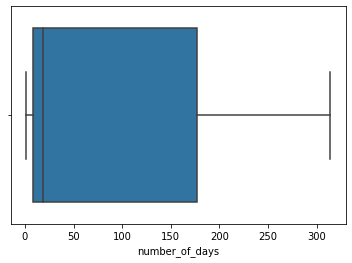

In [277]:
#Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

minimum = dataset_1_used["number_of_days"].min()
maximum = dataset_1_used["number_of_days"].max()
median  = dataset_1_used["number_of_days"].median()
average = dataset_1_used["number_of_days"].mean()

print("Minimun number of days for recovery :", minimum)
print("Maximim number of days for recovery :", maximum)
print("Median number of days for recovery :",  median)
print("Average number of days for recovery :", average)

print("\n\n")
# data = pd.array([minimum,maximum,median,average])
df = (dataset_1_used["number_of_days"].astype('timedelta64[s]'))//86400
#df2 = (dataset_1_used["number_of_days"].astype('timedelta64[s]'))//86400
sns.boxplot(df)